# Deserción de clientes de empresa de Telefonía
Este conjunto de datos procede de una empresa de telecomunicaciones iraní, y cada fila representa a un cliente durante un periodo de un año. Además de una etiqueta de cancelación, hay información sobre la actividad de los clientes, así como los fallos en las llamadas y la duración de la suscripción. 

In [1]:
import pandas as pd
df = pd.read_csv("data/customer_churn.csv")
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


[Source](https://www.kaggle.com/royjafari/customer-churn)  of dataset and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description. 

**Citation**: Jafari-Marandi, R., Denton, J., Idris, A., Smith, B. K., & Keramati, A. (2020). Optimum Profit-Driven Churn Decision Making: Innovative Artificial Neural Networks in Telecom Industry. Neural Computing and Applications.

## Diccionario de datos
| Column                  | Explicación                                                 |
|-------------------------|-------------------------------------------------------------|
| Call Failure            | número de llamadas fallidas                                 |
| Complaints              | binario (0: ninguna reclamación, 1: reclamación)            |
| Subscription Length     | total de meses de suscripción                               |
| Charge Amount           | atributo ordinal (0: importe más bajo, 9: importe más alto) |
| Seconds of Use          | total de segundos de llamadas                               |
| Frequency of use        | número total de llamadas                                    |
| Frequency of SMS        | número total de mensajes de texto                           |
| Distinct Called Numbers | números llamados diferentes                                 |
| Age Group               | atributo ordinal (1: menor edad, 5: mayor edad)             |
| Tariff Plan             | binario (1: pago por uso, 2: contractual)                   |
| Status                  | binario (1: activo, 2: no activo)                           |
| Age                     | edad del cliente                                            |
| Customer Value          | edad del cliente                                            |
| Churn                   | etiqueta de clase (1: baja, 0: no baja)                     |


## Problema
Acaba de ser contratado por una empresa de telecomunicaciones. Un competidor ha entrado recientemente en el mercado y ofrece un plan atractivo a los nuevos clientes. A la empresa de telecomunicaciones le preocupa que este competidor pueda empezar a atraer a sus clientes.
Usted tiene acceso a un conjunto de datos de los clientes de la empresa, que incluye si los clientes han cambiado de plan. La empresa de telecomunicaciones quiere saber si puede utilizar estos datos para predecir si un cliente cambiará de proveedor. También quieren saber qué factores aumentan la probabilidad de que un cliente abandone.
Tendrá que preparar un informe accesible para un público amplio. En él se expondrán los motivos, los pasos, los resultados y las conclusiones.

In [2]:
# ¿Qué grupos de edades envían más SMS que hacen llamadas?
sms_vs_calls = df.groupby(['Age Group'], as_index=False).agg({'Frequency of SMS':'sum','Frequency of use':'sum'})
sms_vs_calls[sms_vs_calls['Frequency of SMS'] > sms_vs_calls['Frequency of use']]


,Age Group,Frequency of SMS,Frequency of use
1,2,78293,74742
2,3,128311,97531


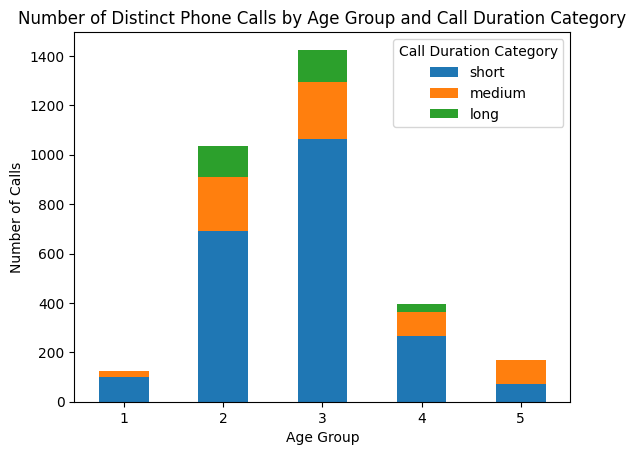

In [6]:
# Crear un gráfico para visualizar los números llamados diferentes por grupo etario.
# Diferenciar en el gráfico entre llamadas cortas, medianas o largas (por el total de segundos)

import matplotlib.pyplot as plt
# Categorizar las llamadas por su duración
df['Call Duration Category'] = pd.cut(df['Seconds of Use'], 3, labels=['short', 'medium', 'long'],)

# Calcular el total de números diferentes por Grupo Etario y duración de llamada
distinct_calls_by_age_category = df.groupby(['Age Group', 'Call Duration Category'], observed=False)['Distinct Called Numbers'].count().unstack()

# Graficar la data
figsize=(12, 4)
distinct_calls_by_age_category.plot(kind='bar', stacked=True)
plt.title('Number of Distinct Phone Calls by Age Group and Call Duration Category')
plt.xlabel('Age Group')
plt.ylabel('Number of Calls')
plt.xticks(rotation=0)
plt.legend(title='Call Duration Category')

plt.show()


In [55]:
# Existen diferencias significativas entre la duración de llamadas de los diferentes planes tarifarios
from scipy import stats

# Assuming your DataFrame is named 'df'
# Filter the data for each tariff plan
pay_as_you_go_calls = df[df['Tariff Plan'] == 1]['Seconds of Use']
contractual_calls = df[df['Tariff Plan'] == 2]['Seconds of Use']

# Perform a t-test to compare the means of call lengths
t_statistic, p_value = stats.ttest_ind(pay_as_you_go_calls, contractual_calls)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
print('-'*26)
print('|', ' '*12, '|    Mean |')
print('-'*26)
print('|Pay As You Go |  {:.1f} |'.format(pay_as_you_go_calls.mean()))
print('|Contractual   |  {:.1f} |'.format(contractual_calls.mean()))
print('-'*26)
print('|t-statistic   |  {:.3f} |'.format(t_statistic))
print('|p-Value       |   {:.3f} |'.format(p_value))
print('-'*26)
if p_value < alpha:
    print("There is a significant difference in call lengths between tariff plans.")
else:
    print("There is no significant difference in call lengths between tariff plans.")


--------------------------
|              |    Mean |
--------------------------
|Pay As You Go |  4309.6 |
|Contractual   |  6403.3 |
--------------------------
|t-statistic   |  -7.563 |
|p-Value       |   0.000 |
--------------------------
There is a significant difference in call lengths between tariff plans.
